**Dataset:** UCI Adult (Income) Dataset  
**Goal:** Understand the structure, quality, and patterns in the data before building models.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo


In [49]:
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

In [ ]:
# Load the Adult dataset with `ucimlrepo`

adult = fetch_ucirepo(id=2)

df_train = adult.data.features
df_train['income'] = adult.data.targets

df_train.head()

X = adult.data.features
y = adult.data.targets

df = X.copy()
df['income'] = y

df.head()


income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

In [41]:
print('--- Metadata keys ---')
print(list(adult.metadata.keys()))

--- Metadata keys ---
['uci_id', 'name', 'repository_url', 'data_url', 'abstract', 'area', 'tasks', 'characteristics', 'num_instances', 'num_features', 'feature_types', 'demographics', 'target_col', 'index_col', 'has_missing_values', 'missing_values_symbol', 'year_of_dataset_creation', 'last_updated', 'dataset_doi', 'creators', 'intro_paper', 'additional_info']


In [ ]:
# The test part of the dataset includes labels with a trailing period, e.g. `<=50K.`.
# We remove the period so we only have two classes: `<=50K` and `>50K`.
# Before cleaning
print("Before cleaning:")
print(df['income'].value_counts())

# Remove trailing '.' and whitespace from labels
df['income'] = df['income'].astype(str).str.replace('.', '', regex=False).str.strip()

print("\nAfter cleaning:")
print(df['income'].value_counts())


Before cleaning:
income
<=50K    37155
>50K     11687
Name: count, dtype: int64

After cleaning:
income
<=50K    37155
>50K     11687
Name: count, dtype: int64


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [43]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,48842.0,NaN,NaN,NaN,38.643585,13.71051,17.0,28.0,37.0,48.0,90.0
workclass,46043,8,Private,33906,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,48842.0,NaN,NaN,NaN,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education,48842,16,HS-grad,15784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education-num,48842.0,NaN,NaN,NaN,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
marital-status,48842,7,Married-civ-spouse,22379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,46033,14,Prof-specialty,6172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,48842,6,Husband,19716,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,48842,5,White,41762,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,48842,2,Male,32650,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# missing values as '?'
(df == '?').sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [44]:
# Replace "?" with NaN
df = df.replace('?', np.nan)

# Count missing values per column
df.isna().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [45]:
# Identify numeric and categorical features
categorical_features = df.select_dtypes(include=['object']).columns
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns

print('Categorical features:', list(categorical_features))
print('Numeric features:', list(numeric_features))

Categorical features: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
Numeric features: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [30]:
df.columns
df[numeric_features] = df[numeric_features].apply(pd.to_numeric, errors='coerce')
df[numeric_features].dtypes

age               int64
fnlwgt            int64
education-num     int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
dtype: object

In [31]:
# Target (income) distribution
df['income'].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

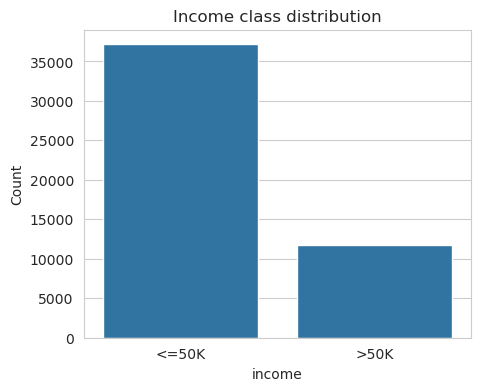

In [32]:
plt.figure(figsize=(5, 4))
sns.countplot(x='income', data=df)
plt.title('Income class distribution')
plt.ylabel('Count')
plt.show()

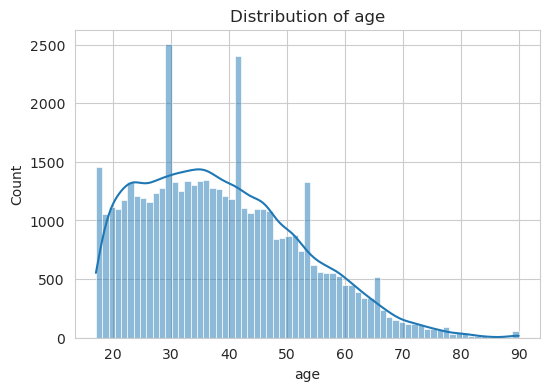

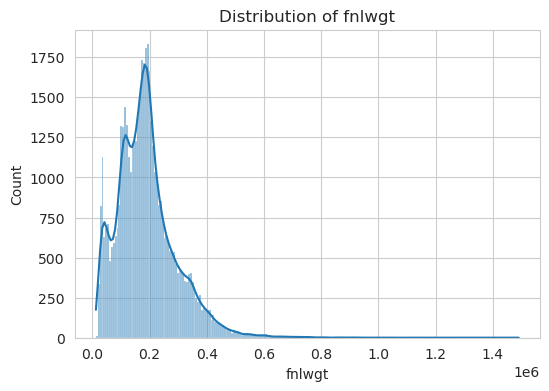

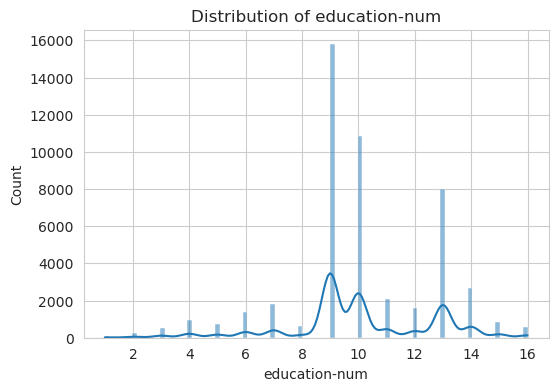

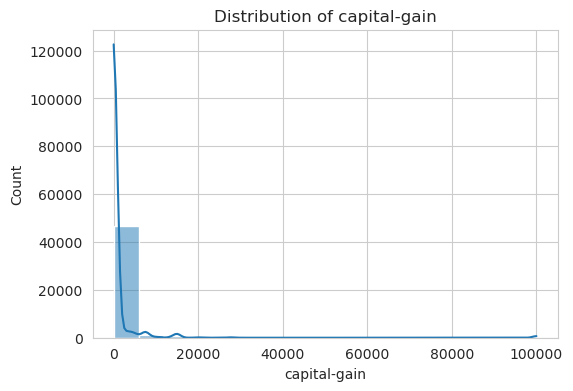

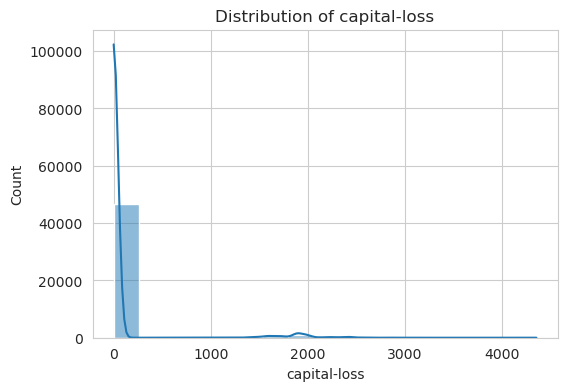

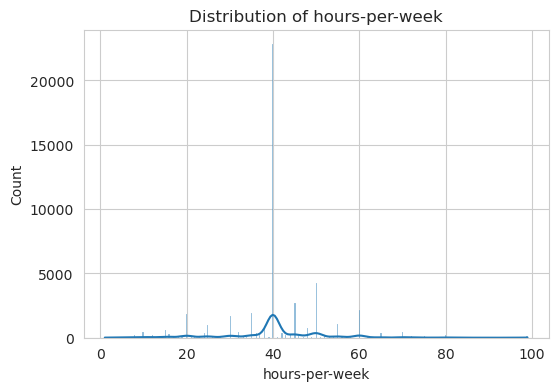

In [46]:
# Numeric Histograms for each numeric feature
for col in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

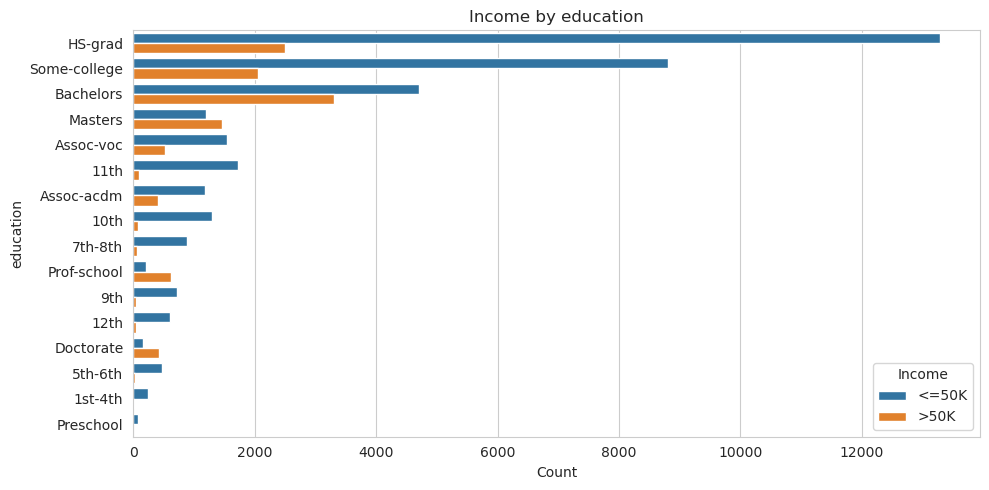

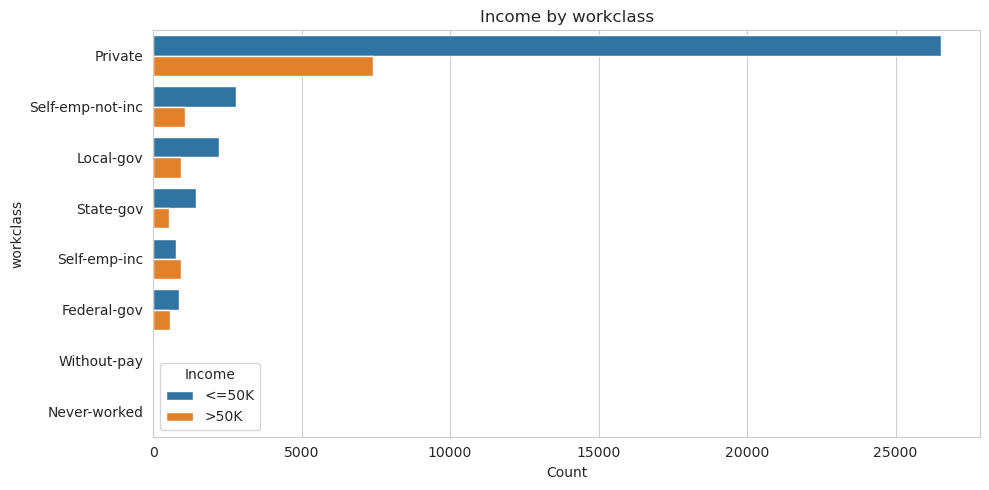

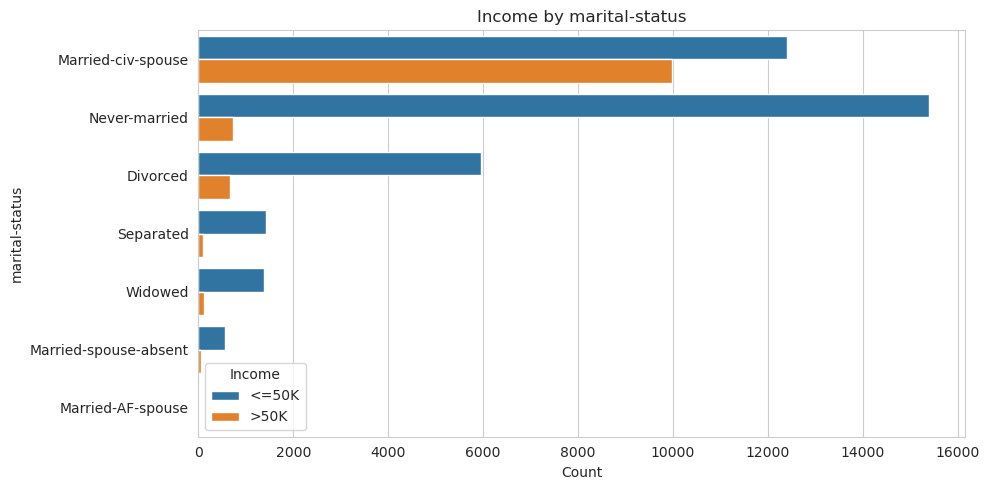

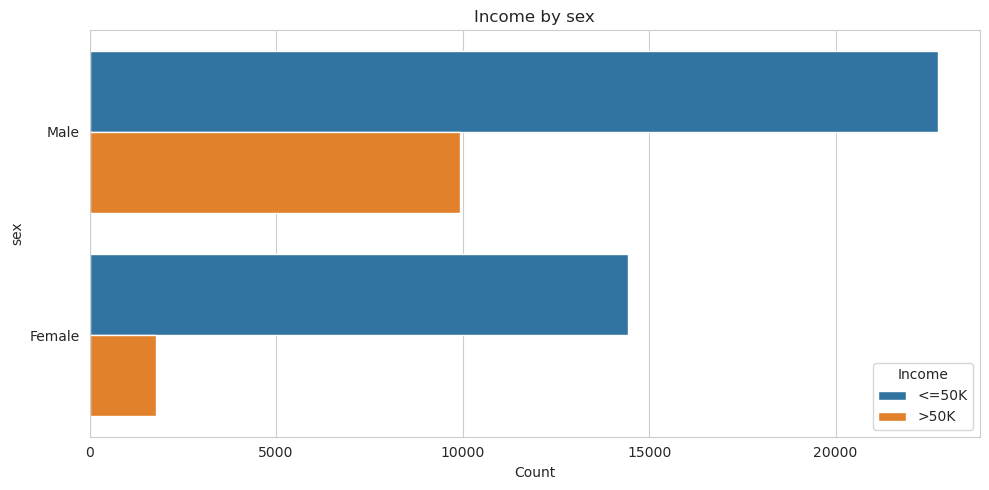

In [47]:
# Now, we look at how income is distributed across some key categorical features.
cat_cols_to_plot = ['education', 'workclass', 'marital-status', 'sex']

for col in cat_cols_to_plot:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=col, hue='income', data=df,
                  order=df[col].value_counts().index)
    plt.title(f'Income by {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.legend(title='Income')
    plt.tight_layout()
    plt.show()

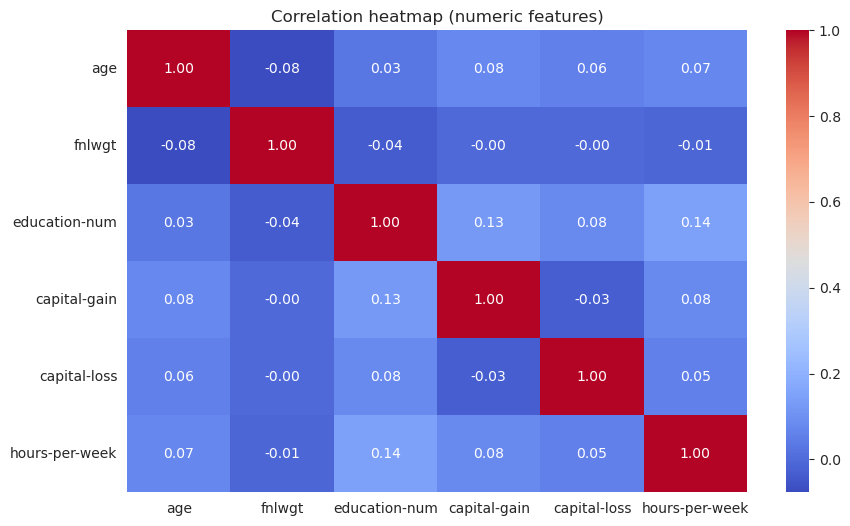

In [48]:
# Correlation heatmap for numeric features
plt.figure(figsize=(10, 6))
cor_mat = df[numeric_features].corr()
sns.heatmap(cor_mat, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation heatmap (numeric features)')
plt.show()

**Key Observations**


- Individuals with higher capital gains almost exclusively fall into the >50K income group, indicating strong predictive power.

- A higher education level, especially beyond high school, is strongly associated with higher income.

- Individuals earning >50K generally work more hours per week, though unusually long working hours are uncommon.

- Married individuals, particularly those with civilian spouses, appear more frequently in the higher-income category.

- Certain white-collar and government-related occupations tend to correlate with higher earnings, while many private sector roles are associated with lower income.

- There is a noticeable gender disparity, with males more likely to fall into the >50K group, suggesting possible demographic imbalance in the dataset.